<a href="https://colab.research.google.com/github/manhhungtr211/LLMProject-TextClassification/blob/main/sentiment_model_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q datasets peft requests torch bitsandbytes transformers trl accelerate sentencepiece matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from datasets import load_dataset, concatenate_datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np


In [ ]:
# Tải Emotion
raw_dataset = load_dataset("emotion")

# Gộp train và test thành một tập duy nhất
dataset = concatenate_datasets([raw_dataset["train"], raw_dataset["validation"], raw_dataset["test"]])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
df = dataset.to_pandas()

# Data Exploration

In [ ]:
print(df.head())

                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3


In [ ]:
df.shape

(20000, 2)

In [ ]:
df["label"].shape[0]

20000

In [ ]:
# How many labels are there?
length = df["label"].shape[0]
print(f"There are {length} labels in the dataset")

# How many unique labels are there?
unique_labels = df["label"].nunique()
print(f"There are {unique_labels} unique labels in the dataset")

There are 20000 labels in the dataset
There are 6 unique labels in the dataset


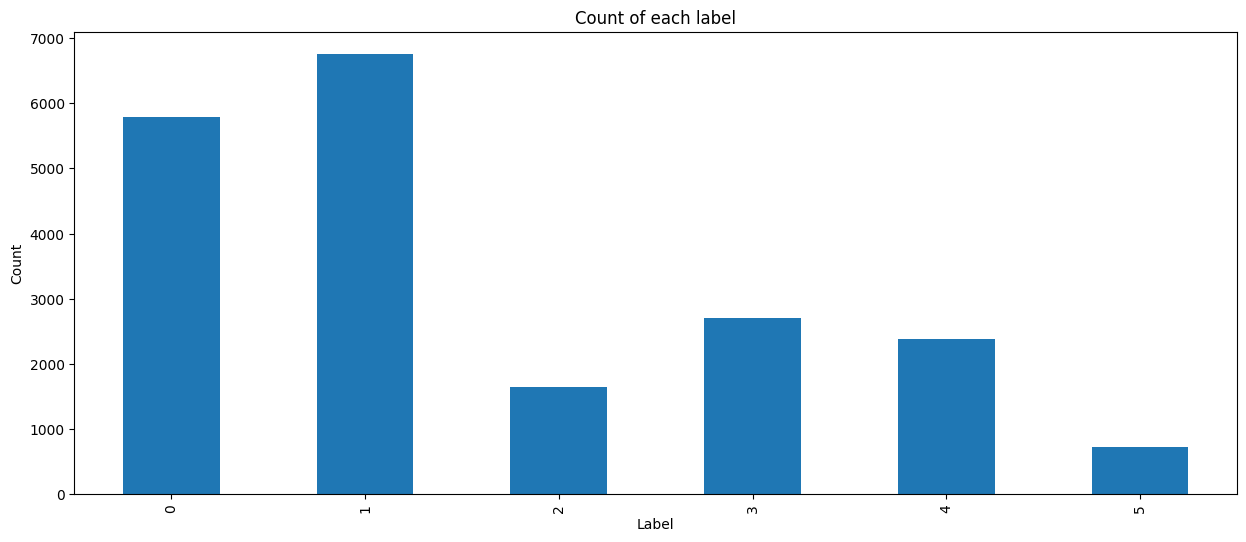

In [ ]:
# Plotting the distribution of labels
label_count = df["label"].value_counts().sort_index()
plt.figure(figsize=(15, 6))
label_count.plot(kind='bar')
plt.title("Count of each label")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

In [ ]:
# Explore length of the text
sentences = []
for _, data in df.iterrows():
    try:
        sentences.append(len(data["text"]))
    except ValueError:
        pass

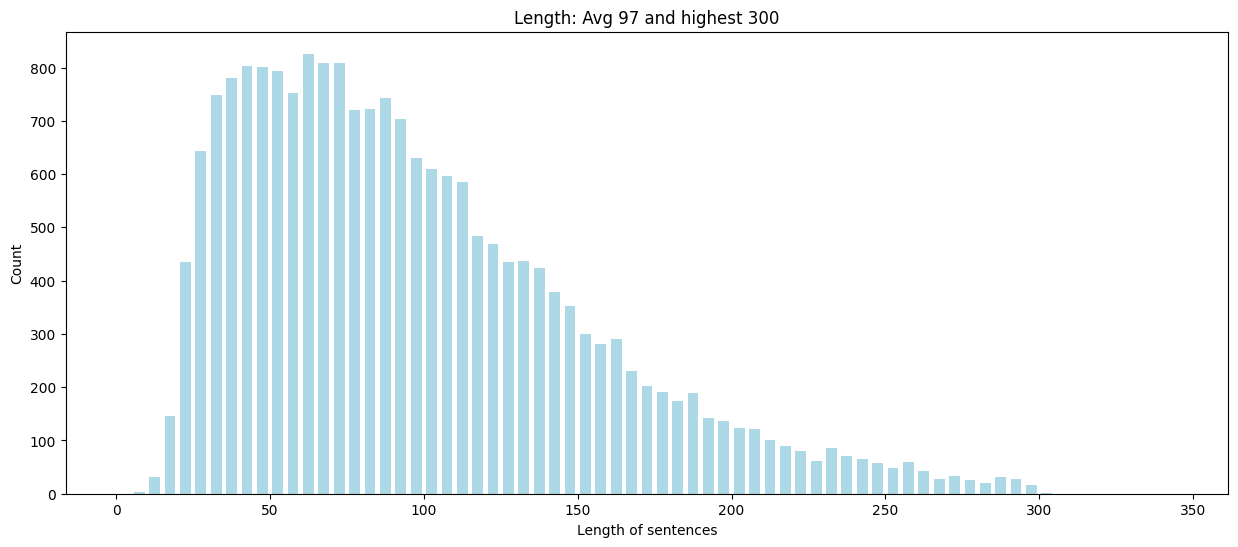

In [ ]:
# Plot lengths of the sentences
plt.figure(figsize=(15, 6))
plt.title(f"Length: Avg {sum(sentences)/len(sentences):,.0f} and highest {max(sentences)}")
plt.xlabel("Length of sentences")
plt.ylabel("Count")
plt.hist(sentences, rwidth=0.7, color="lightblue", bins=range(0, 350, 5))
plt.show()

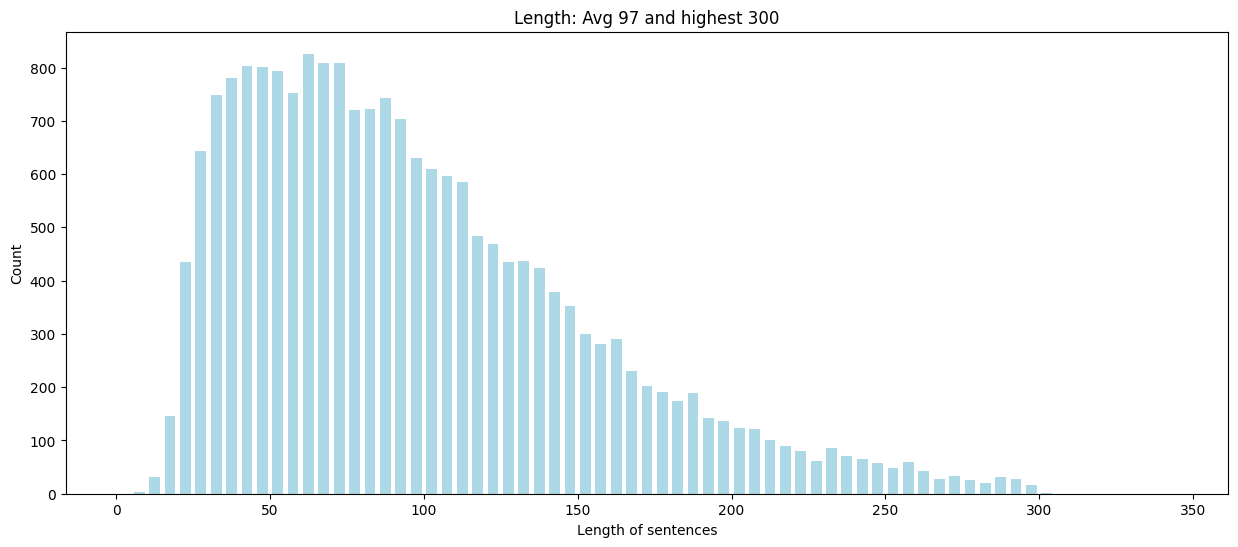

In [ ]:
# Plot lengths of the sentences
plt.figure(figsize=(15, 6))
plt.title(f"Length: Avg {sum(sentences)/len(sentences):,.0f} and highest {max(sentences)}")
plt.xlabel("Length of sentences")
plt.ylabel("Count")
plt.hist(sentences, rwidth=0.7, color="lightblue", bins=range(0, 350, 5))
plt.show()

In [ ]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
train_dataset, temp_data = train_test_split(df, test_size=0.2, random_state=42)
val_dataset, test_dataset = train_test_split(temp_data, test_size=0.5, random_state=42)

In [ ]:
train_data_path = '/content/drive/MyDrive/train.csv'
val_data_path = '/content/drive/MyDrive/val.csv'
test_data_path = '/content/drive/MyDrive/test.csv'

In [ ]:
train_dataset.to_csv(train_data_path, index=False)
val_dataset.to_csv(val_data_path, index=False)
test_dataset.to_csv(test_data_path, index=False)

# Load data

In [ ]:
from datasets import load_dataset

In [ ]:
dataset = load_dataset('csv', data_files={'train': train_data_path, 'validation': val_data_path, 'test': test_data_path})

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
train_dataset = dataset['train']
val_dataset = dataset['validation']
test_dataset = dataset['test']

# Tokenizer

In [ ]:
from transformers import DistilBertTokenizer
from transformers import AutoTokenizer
from transformers import DataCollatorWithPadding

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased',cache_dir='./all_models')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

tokenizer_train = train_dataset.map(preprocess_function)
tokenizer_val = val_dataset.map(preprocess_function)
tokenizer_test = test_dataset.map(preprocess_function)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
tokenizer_train

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 16000
})

In [ ]:
tokenizer_val

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 2000
})

In [ ]:
tokenizer_test

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 2000
})

In [ ]:
print(type(tokenizer_train))

<class 'datasets.arrow_dataset.Dataset'>


In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Training model

In [ ]:
from transformers import AutoModelForSequenceClassification
import numpy as np
from datasets import load
from transformers import TrainingArguments, Trainer
from huggingface_hub import notebook_login
import torch

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=6, cache_dir='./all_models')

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted', pos_label=0)
    cm = confusion_matrix(labels, preds, labels=[0, 1, 2, 3, 4, 5])

    acc = accuracy_score(labels, preds)
    return {
        'y_true': labels,
        'y_pred': preds,
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall,
        'confusion_matrix': cm
    }


In [ ]:
repo_name = "/content/drive/MyDrive/sentiment_model"

train_args = TrainingArguments(
    output_dir=repo_name,
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    save_strategy="epoch",
    warmup_steps=100,
    logging_steps=50,
    fp16=True,
    push_to_hub=False,
    report_to="none"
)


In [ ]:
trainer = Trainer(
    model=model,
    args=train_args,
    train_dataset=tokenizer_train,
    eval_dataset=tokenizer_val,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)


<ipython-input-33-1877474ca71d>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
train_results = trainer.train()

Step,Training Loss
50,1.712500
100,1.536300
150,1.194400
200,0.938300
250,0.762800
300,0.613600
350,0.494100
400,0.401800
450,0.274500
500,0.312600


In [ ]:
print(train_results)

TrainOutput(global_step=3000, training_loss=0.26328921190897625, metrics={'train_runtime': 173.3139, 'train_samples_per_second': 276.954, 'train_steps_per_second': 17.31, 'total_flos': 582860872649664.0, 'train_loss': 0.26328921190897625, 'epoch': 3.0})


# Compute the evaluation metrics

In [ ]:
eval_results = trainer.evaluate()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1618: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
print(eval_results)

{'eval_loss': 0.14278224110603333, 'eval_y_true': array([1, 0, 5, ..., 1, 0, 1]), 'eval_y_pred': array([1, 0, 1, ..., 1, 0, 1]), 'eval_accuracy': 0.9405, 'eval_f1': 0.9403737118254991, 'eval_precision': 0.9405519692532291, 'eval_recall': 0.9405, 'eval_confusion_matrix': array([[562,   2,   1,  10,  11,   0],
       [  3, 697,  18,   0,   0,   1],
       [  0,  18, 143,   0,   0,   0],
       [  7,   2,   0, 242,   4,   0],
       [  0,   3,   0,   7, 179,  12],
       [  0,   7,   0,   0,  13,  58]]), 'eval_runtime': 1.1503, 'eval_samples_per_second': 1738.743, 'eval_steps_per_second': 108.671, 'epoch': 3.0}


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

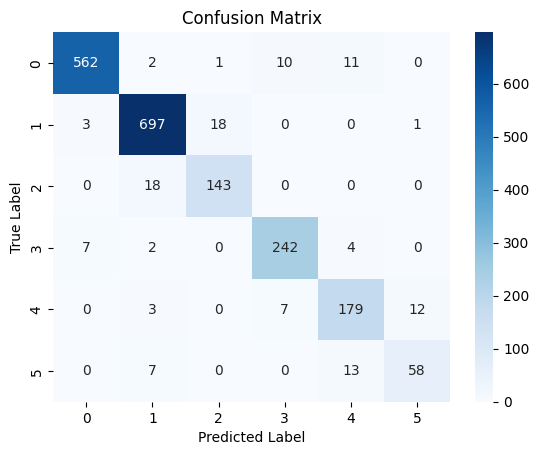

In [ ]:
cm = eval_results['eval_confusion_matrix']

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
test_results = trainer.evaluate(eval_dataset=tokenizer_test)
print(test_results)

{'eval_loss': 0.19128729403018951, 'eval_y_true': array([4, 4, 4, ..., 3, 4, 1]), 'eval_y_pred': array([4, 4, 4, ..., 3, 4, 1]), 'eval_accuracy': 0.9325, 'eval_f1': 0.9324107800029805, 'eval_precision': 0.9324591075258666, 'eval_recall': 0.9325, 'eval_confusion_matrix': array([[567,   6,   0,   6,  11,   0],
       [  5, 627,  23,   2,   1,   0],
       [  1,  25, 148,   0,   0,   0],
       [  8,   1,   0, 262,   6,   0],
       [  7,   1,   0,   8, 196,  14],
       [  1,   5,   0,   0,   4,  65]]), 'eval_runtime': 1.3751, 'eval_samples_per_second': 1454.399, 'eval_steps_per_second': 90.9, 'epoch': 3.0}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1618: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


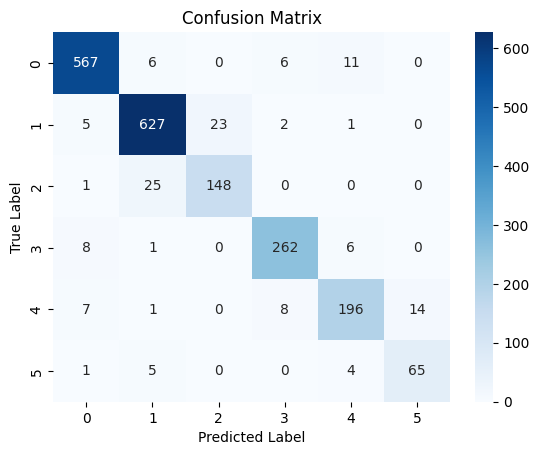

In [ ]:
cm = test_results['eval_confusion_matrix']

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()